# Deep Learning

# I. Overview

Describe the objective of this assignment. You can briefly state how you accompilsh it.

In this assignment, we are supposed to implement Deep Neural network with large number of hidden layers. With the network, I am using Perceptron Network with 6, 12 and 20 layers. Using these networks, I am performing some experiments and comparing the results and hidden layer output.

In [51]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import copy
import matplotlib.pyplot as plt
import tensorflow as tf
import os

import sklearn as skl
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cross_validation import train_test_split

import tensorflow as tf
from IPython.display import clear_output, Image, display, Markdown, HTML

# Configurations
matplotlib.rcParams['agg.path.chunksize'] = 10000
%matplotlib inline

# Set display parameters
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 10)

# II. Data

The dataset selected for performing this assignment is "Census Income Data" from the following source.
Source: https://archive.ics.uci.edu/ml/datasets/Census+Income
It is extracted from Census Income dataset by Barry Becker (from Data Mining and Visualization Lab, Silicon Graphics). The dataset can be used to predict whether a particular person can earn more than $50k per year or not.

### Attributes
The attributes of the dataset are:
* age: continuous numbers. 
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* fnlwgt: Final sampling weight, generated by census bureau. 
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* education-num: continuous. 
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
* sex: Female, Male. 
* capital-gain: gain from assets; continuous. 
* capital-loss: loss from other assets; continuous. 
* hours-per-week: continuous. 
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

### Purpose
This dataset can be used for classification, to determine whether salary is greater than 50K or less than 50K

In [52]:
def shape_text(shape) :
    return str(shape[0]) + ' rows and ' + str(shape[1]) + ' columns'

# Read the data
names = ['age', 
         'workclass', 
         'fnlwgt', 
         'education', 
         'education-num', 
         'marital-status', 
         'occupation', 
         'relationship', 
         'race', 
         'sex', 
         'capital-gain', 
         'capital-loss', 
         'hours-per-week', 
         'native-country', 
         'salary']
types = {
    'age': 'int64',
    'workclass': 'category',
    'fnlwgt': 'int64', 
    'education': 'category', 
    'education-num': 'int64', 
    'marital-status': 'category', 
    'occupation': 'category', 
    'relationship': 'category', 
    'race': 'category', 
    'sex': 'category', 
    'capital-gain': 'int64', 
    'capital-loss': 'int64', 
    'hours-per-week': 'int64', 
    'native-country': 'category', 
    'salary': 'category'
}

strip = lambda x: x.strip()
converters = {
    'workclass': strip,
    'education': strip,
    'marital-status': strip,
    'occupation': strip,
    'relationship': strip,
    'race': strip,
    'native-country': strip,
    'salary': strip
};

# Read the files
train_set = pd.read_csv('adult.data', header=None, names=names, sep=', ', na_values=['?'])
test_set = pd.read_csv('adult.test', header=None, names=names, sep=', ', na_values=['?'])

output = 'Shape of the training set is: \n' + shape_text(train_set.shape)
display(Markdown(output))
output = 'Shape of the test set is: \n' + shape_text(test_set.shape)
display(Markdown(output))

/Users/bairathirahul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:51: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/Users/bairathirahul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


Shape of the training set is: 
32561 rows and 15 columns

Shape of the test set is: 
16281 rows and 15 columns

In [53]:
train_set

age         workclass  fnlwgt     education  education-num  ...    \
0       39         State-gov   77516     Bachelors             13  ...     
1       50  Self-emp-not-inc   83311     Bachelors             13  ...     
2       38           Private  215646       HS-grad              9  ...     
3       53           Private  234721          11th              7  ...     
4       28           Private  338409     Bachelors             13  ...     
5       37           Private  284582       Masters             14  ...     
6       49           Private  160187           9th              5  ...     
...    ...               ...     ...           ...            ...  ...     
32554   53           Private  321865       Masters             14  ...     
32555   22           Private  310152  Some-college             10  ...     
32556   27           Private  257302    Assoc-acdm             12  ...     
32557   40           Private  154374       HS-grad              9  ...     
32558   58           Private  151910       HS-grad              9  ...     
32559   22           Private  201490       HS-grad              9  ...     
32560   52      Self-emp-inc  287927       HS-grad              9  ...     

      capital-gain capital-loss hours-per-week native-country salary  
0             2174            0             40  United-States  <=50K  
1                0            0             13  United-States  <=50K  
2                0            0             40  United-States  <=50K  
3                0            0             40  United-States  <=50K  
4                0            0             40           Cuba  <=50K  
5                0            0             40  United-States  <=50K  
6                0            0             16        Jamaica  <=50K  
...            ...          ...            ...            ...    ...  
32554            0            0             40  United-States   >50K  
32555            0            0             40  United-States  <=50K  
32556            0            0             38  United-States  <=50K  
32557            0            0             40  United-States   >50K  
32558            0            0             40  United-States  <=50K  
32559            0            0             20  United-States  <=50K  
32560        15024            0             40  United-States   >50K  

[32561 rows x 15 columns]

## Test for Missing Values
There are missing value in the data indicated by '?'## Test for Missing Values

In [54]:
def fraction_missing(dataset):
    """ Identify the fraction of missing values in each column
    """
    cols = dataset.columns
    fractions = {}
    total = dataset.index.shape[0]
    
    for col in cols:
        fractions[col] = dataset[dataset[col].isnull()].shape[0] / total            
    return pd.DataFrame(list(fractions.items()), columns=['columns', 'fraction_of_null'])
    
display(Markdown('### Missing in Training Set'))
display(HTML(fraction_missing(train_set).to_html()))

display(Markdown('### Missing in Test Set'))
fraction_missing(test_set)

### Missing in Training Set

### Missing in Test Set

columns  fraction_of_null
0              age             0.000
1        workclass             0.059
2           fnlwgt             0.000
3        education             0.000
4    education-num             0.000
5   marital-status             0.000
6       occupation             0.059
7     relationship             0.000
8             race             0.000
9              sex             0.000
10    capital-gain             0.000
11    capital-loss             0.000
12  hours-per-week             0.000
13  native-country             0.017
14          salary             0.000

In [55]:
# For each column with the missing values, we will impute with mode
train_set['workclass'].fillna(train_set['workclass'].value_counts().index[0], inplace=True)
train_set['occupation'].fillna(train_set['occupation'].value_counts().index[0], inplace=True)
train_set['native-country'].fillna(train_set['native-country'].value_counts().index[0], inplace=True)

test_set['workclass'].fillna(test_set['workclass'].value_counts().index[0], inplace=True)
test_set['occupation'].fillna(test_set['occupation'].value_counts().index[0], inplace=True)
test_set['native-country'].fillna(test_set['native-country'].value_counts().index[0], inplace=True)

## Converting Categories to Codes
For classification, we would need to convert categories to their corresponding codes

In [56]:
# Change object to category types
train_set = train_set.astype(types)
test_set = test_set.astype(types)

# Read category labels and convert category to numerical types
clabels = {}
for col in train_set.columns:
    if train_set[col].dtype.name == 'category':
        clabels[col] = list(train_set[col].cat.categories)
        train_set[col] = train_set[col].cat.codes
        test_set[col] = test_set[col].cat.codes

The dataset looks good. So we can move ahead with the preliminary analysis.

## Preliminary Analysis

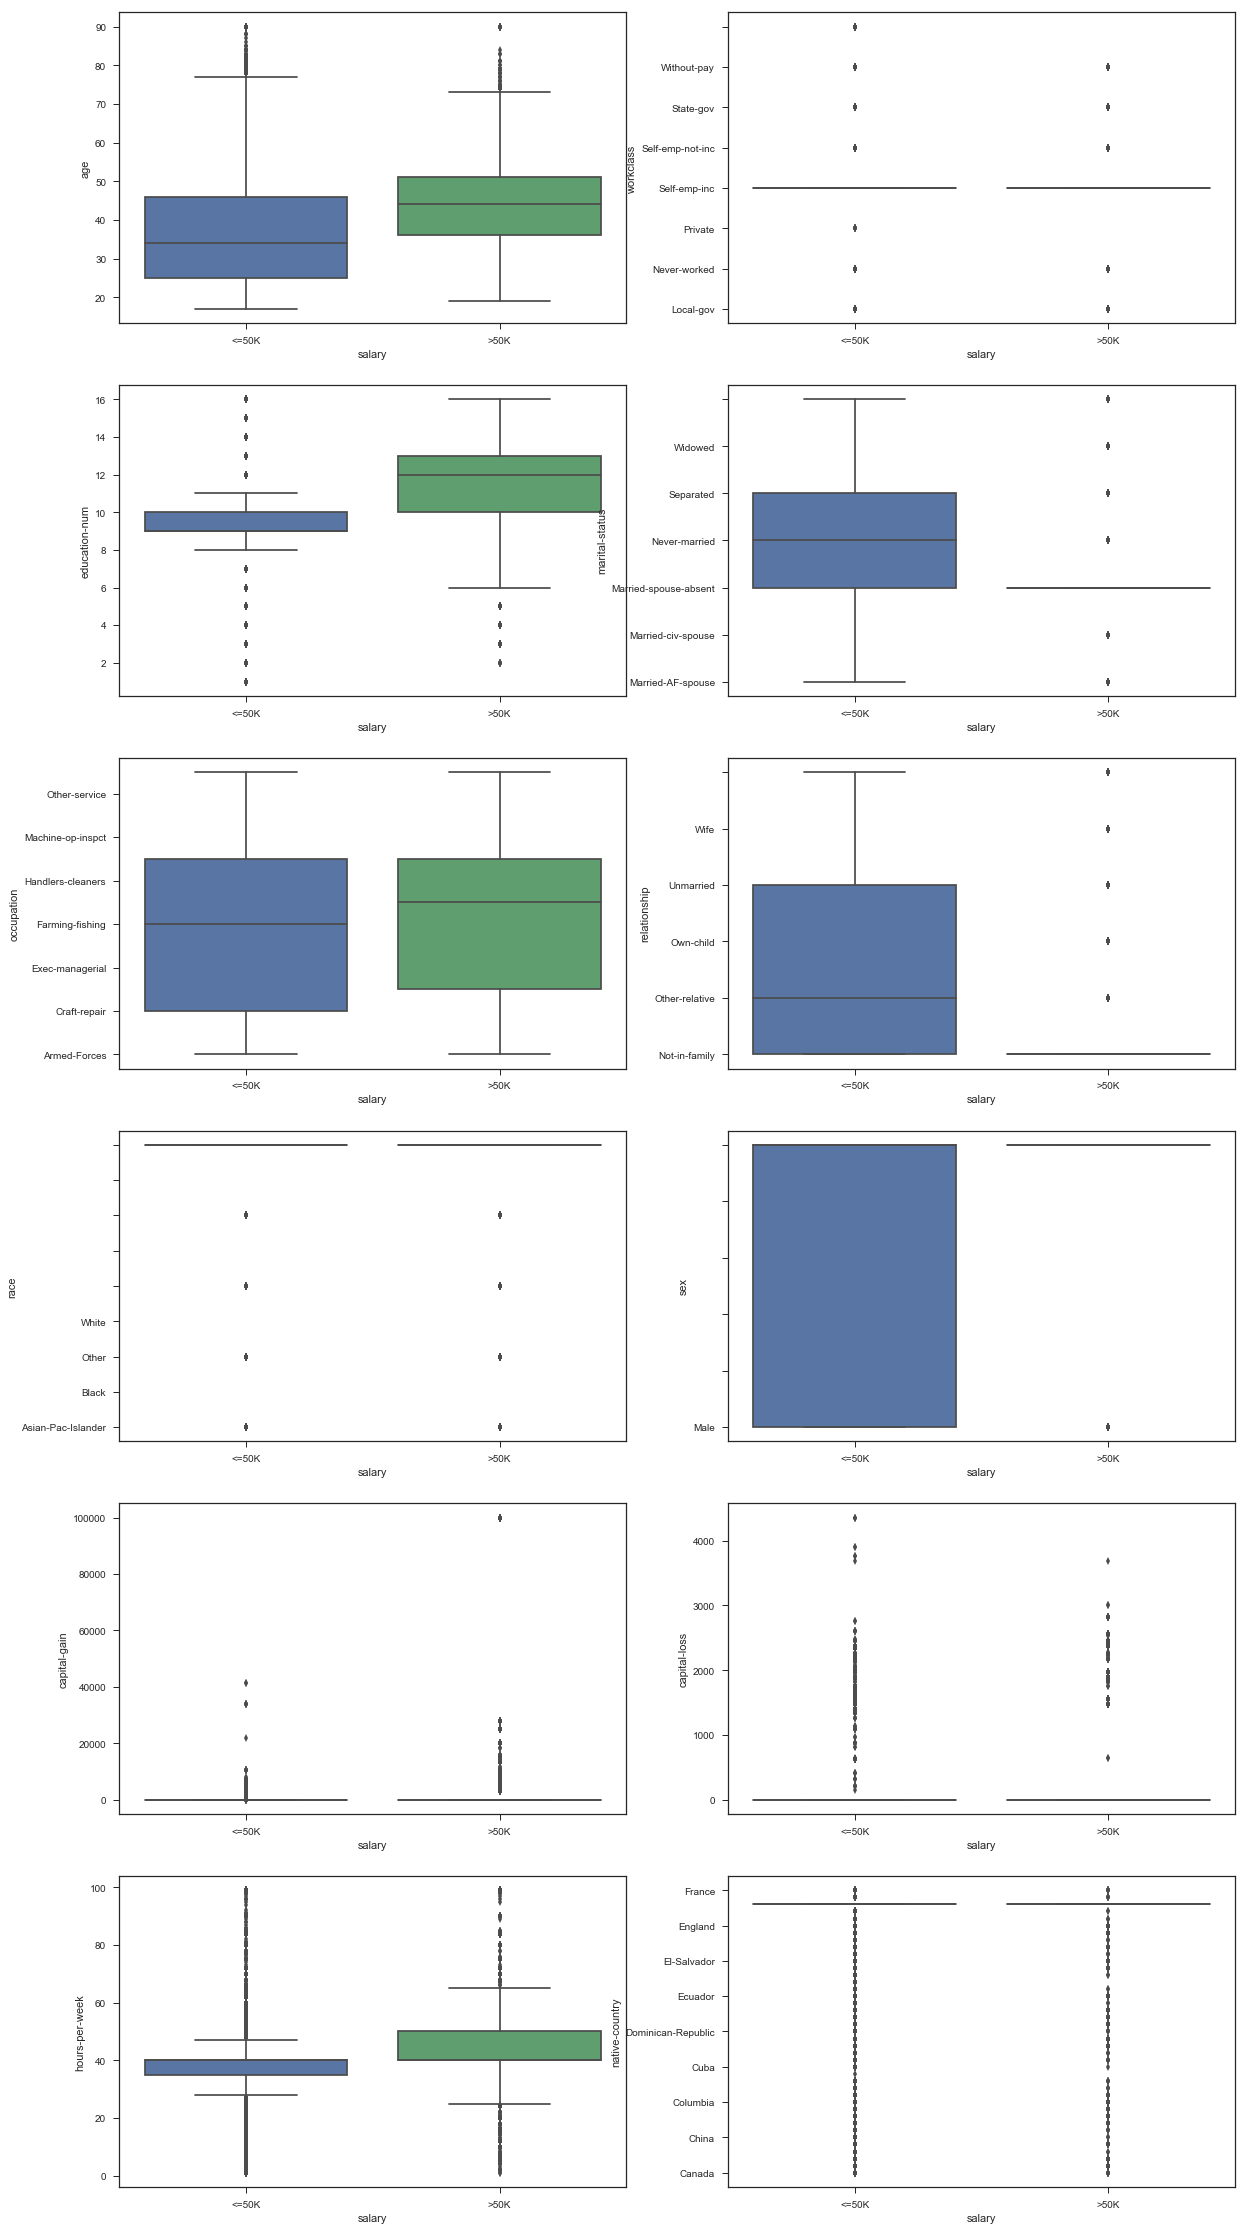

In [57]:
# Select columns for the analysis
selected_cols = ['age', 'workclass', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']

# Generate box plots with respect to "apply" without outliers
fig = plt.figure(figsize=(20, 40))
for i, col in enumerate(selected_cols):
    fig.add_subplot(int(math.ceil(len(selected_cols) / 2)), 2, i + 1)
    ax = sns.boxplot(x='salary', y=col, data=train_set)
    ax.set_xticklabels(labels=clabels['salary'])
    if col in clabels:
        ax.set_yticklabels(labels=clabels[col])
        
plt.show()

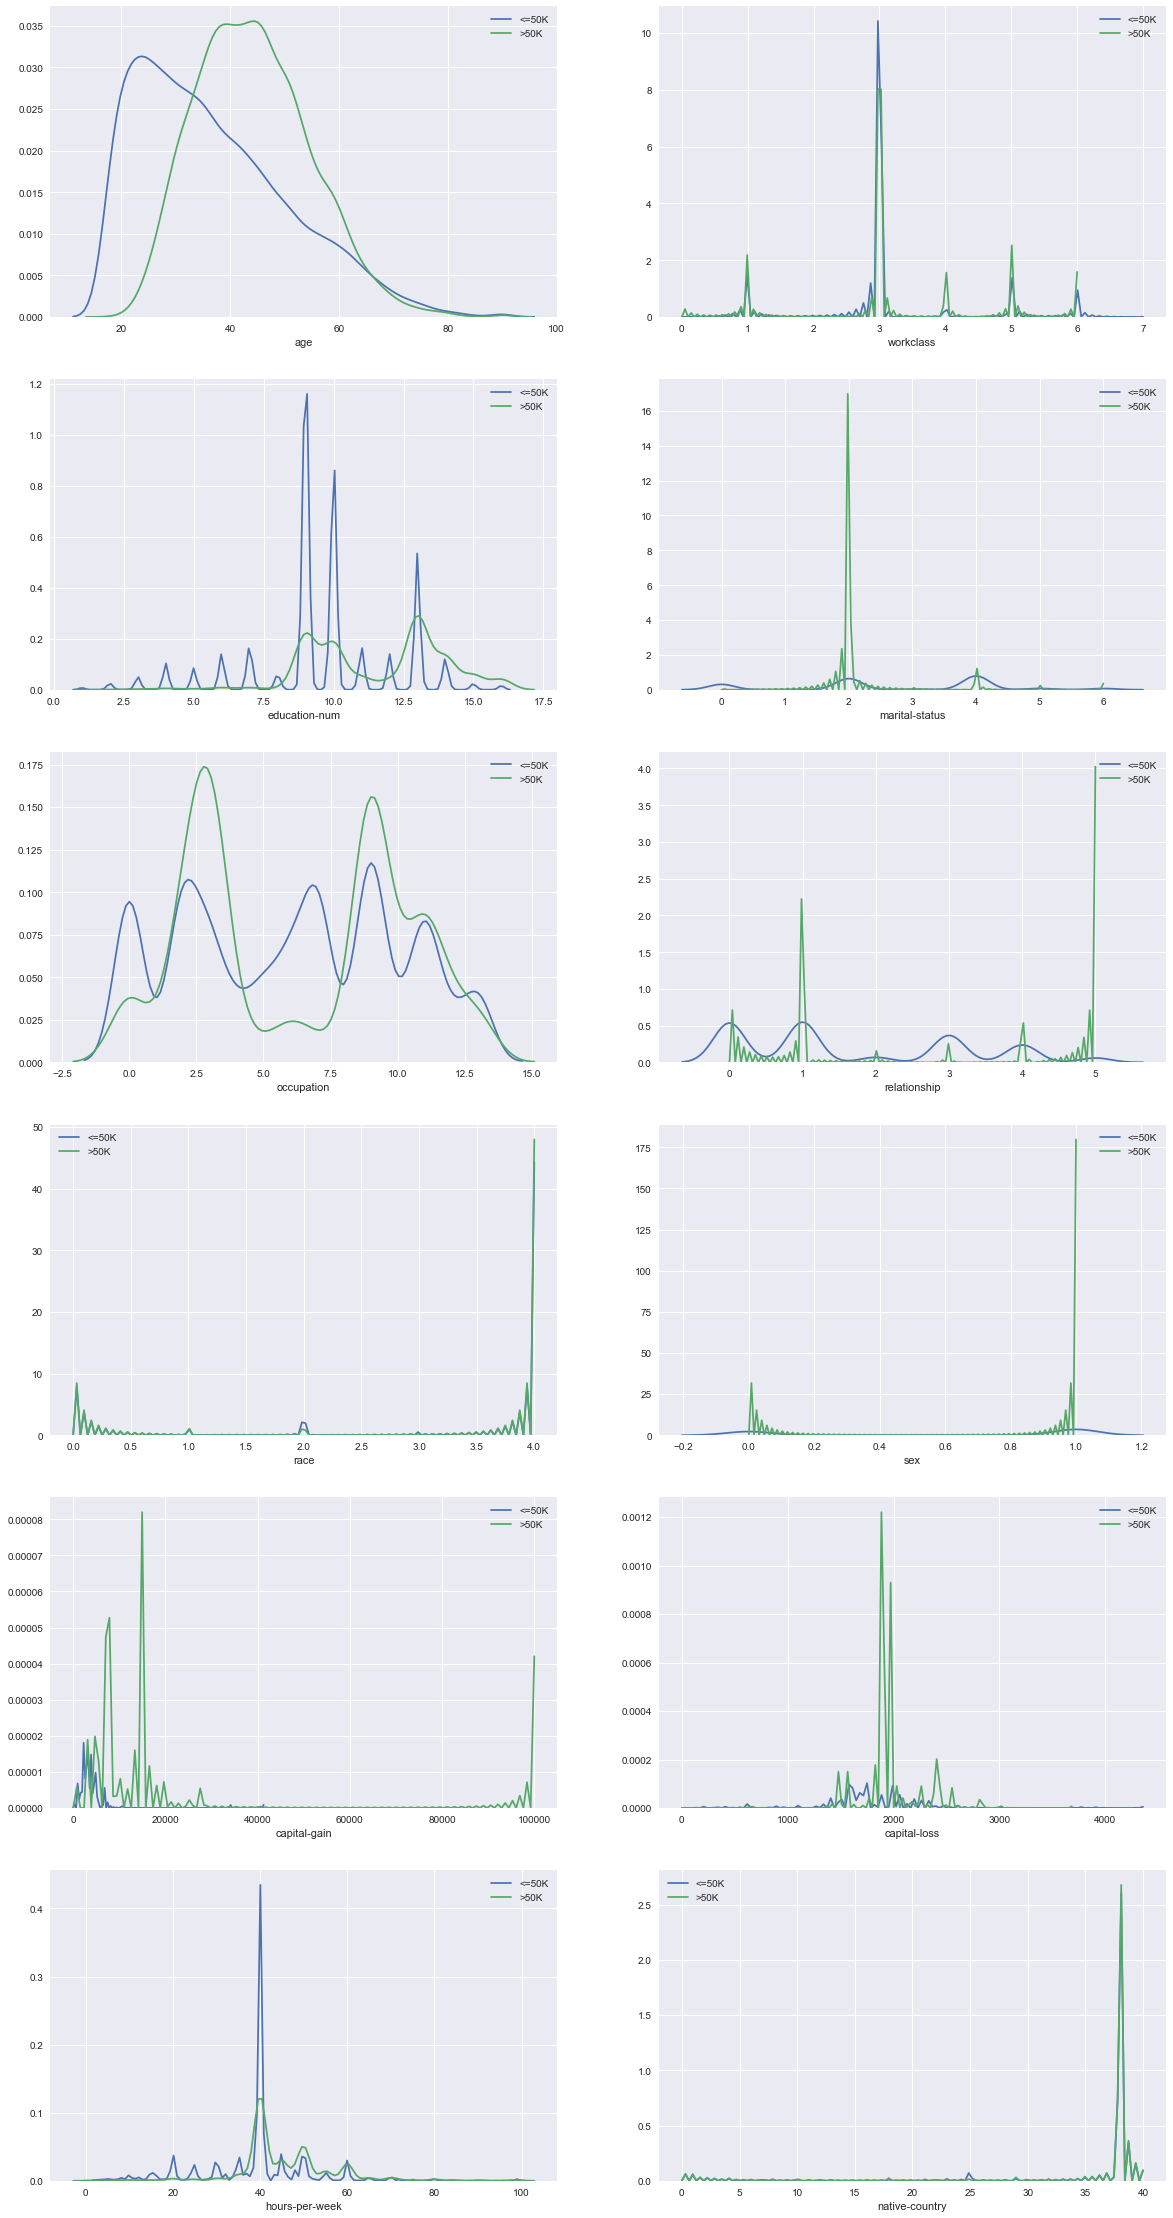

In [58]:
# Generate distribution plots
fig = plt.figure(figsize=(20, 40))
sns.set(color_codes=True)
for i, col in enumerate(selected_cols):
    fig.add_subplot(int(math.ceil(len(selected_cols) / 2)), 2, i + 1)
    sns.distplot(train_set[train_set['salary'] == 0][col], label=clabels['salary'][0], kde=True, hist=False)
    sns.distplot(train_set[train_set['salary'] == 1][col], label=clabels['salary'][1], kde=True, hist=False)
        
plt.show()

## Correlation Matrix

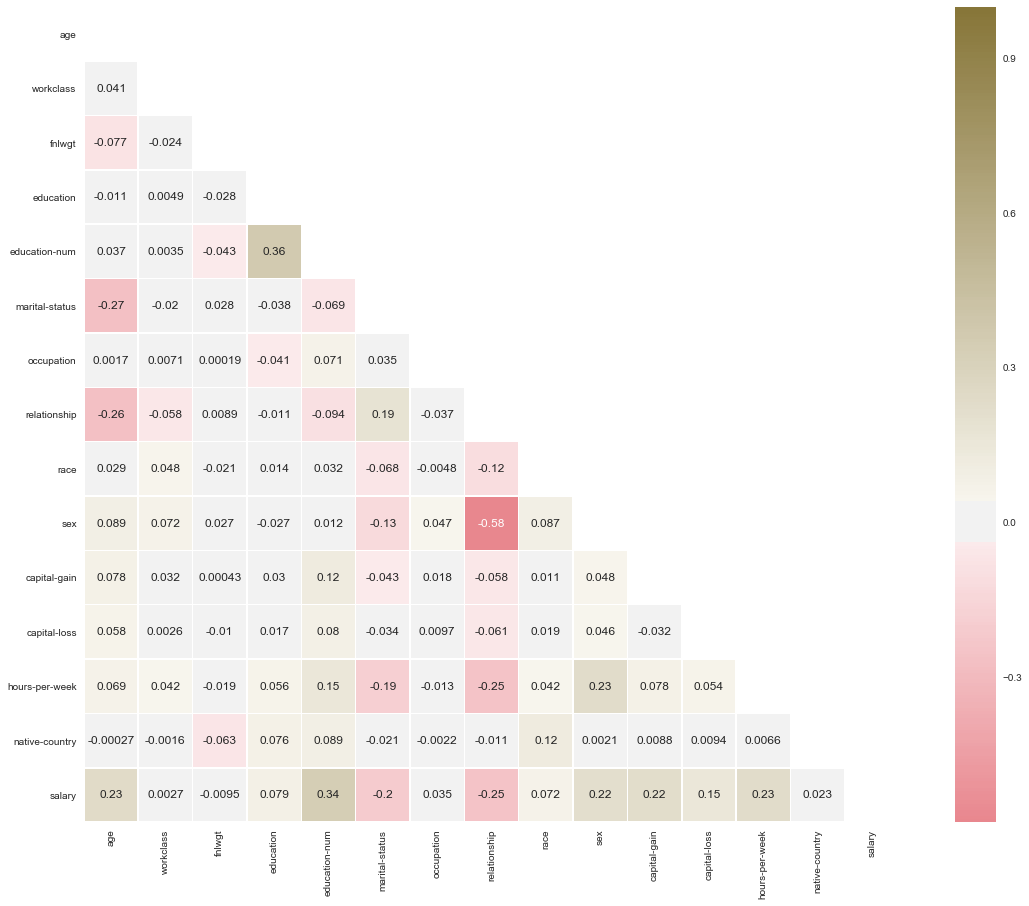

In [59]:
corr = train_set.corr()

# Prepare mask and color palette
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(10, 70, as_cmap=True)

# Plot heatmap of correation matrix
fig = plt.figure(figsize=(20, 15))
sns.set(style="white")
sns.heatmap(corr, mask=mask, square=True, cmap=cmap, center=0, annot=True, linewidths=.5)
plt.show()

## Feature Selection
By observing the distribution, box-plots and correlation matrix, we can see that features "fnlgwt", "workclass", "race", "capital-gain", "native-country" and "sex", have very less variation, hence less imported. Therefore, I have selected counter features to maximize variation and improve classification:
'age', 'education-num', 'marital-status', 'occupation', 'relationship', 'hours-per-week'

In [60]:
selected_cols = ['age', 'education-num', 'marital-status', 'occupation', 'relationship', 'hours-per-week']

### Scatter Plot
From the below plots, we can see that there is no linear decision boundary.

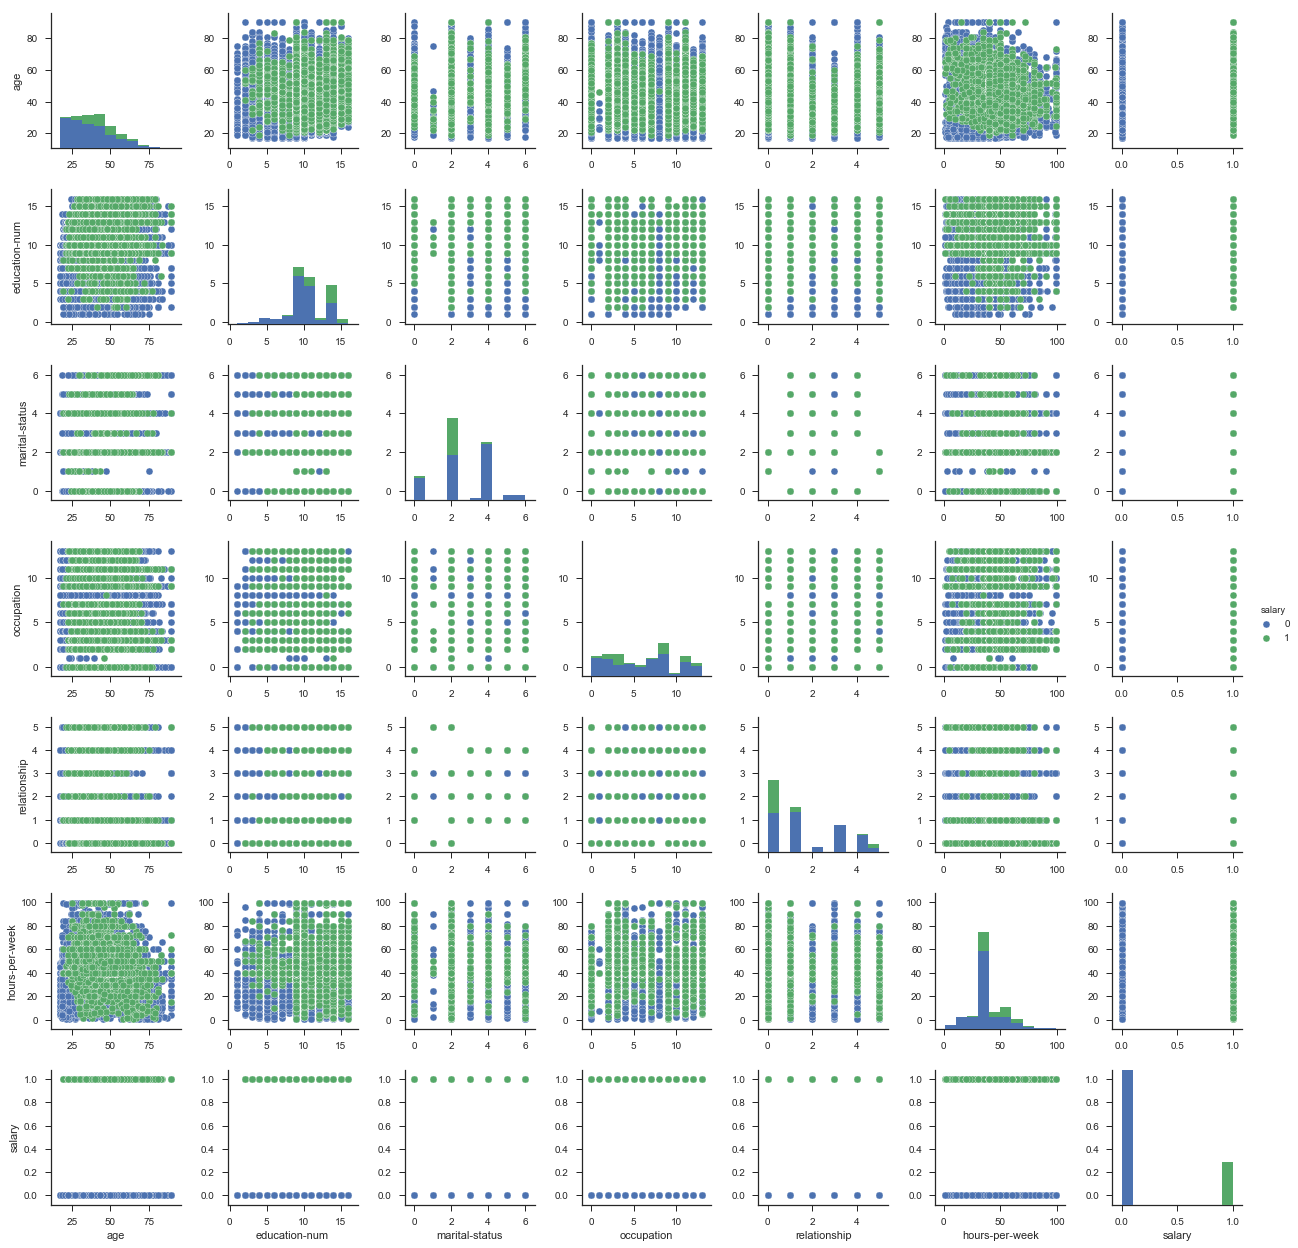

In [61]:
sns.set(style="ticks")
sns.pairplot(train_set[selected_cols + ['salary']], hue="salary")
plt.show()

## Balancing Classes
The negative to positive ratio in the dataset is 3:1. Performing under-sampling to balance the classes.

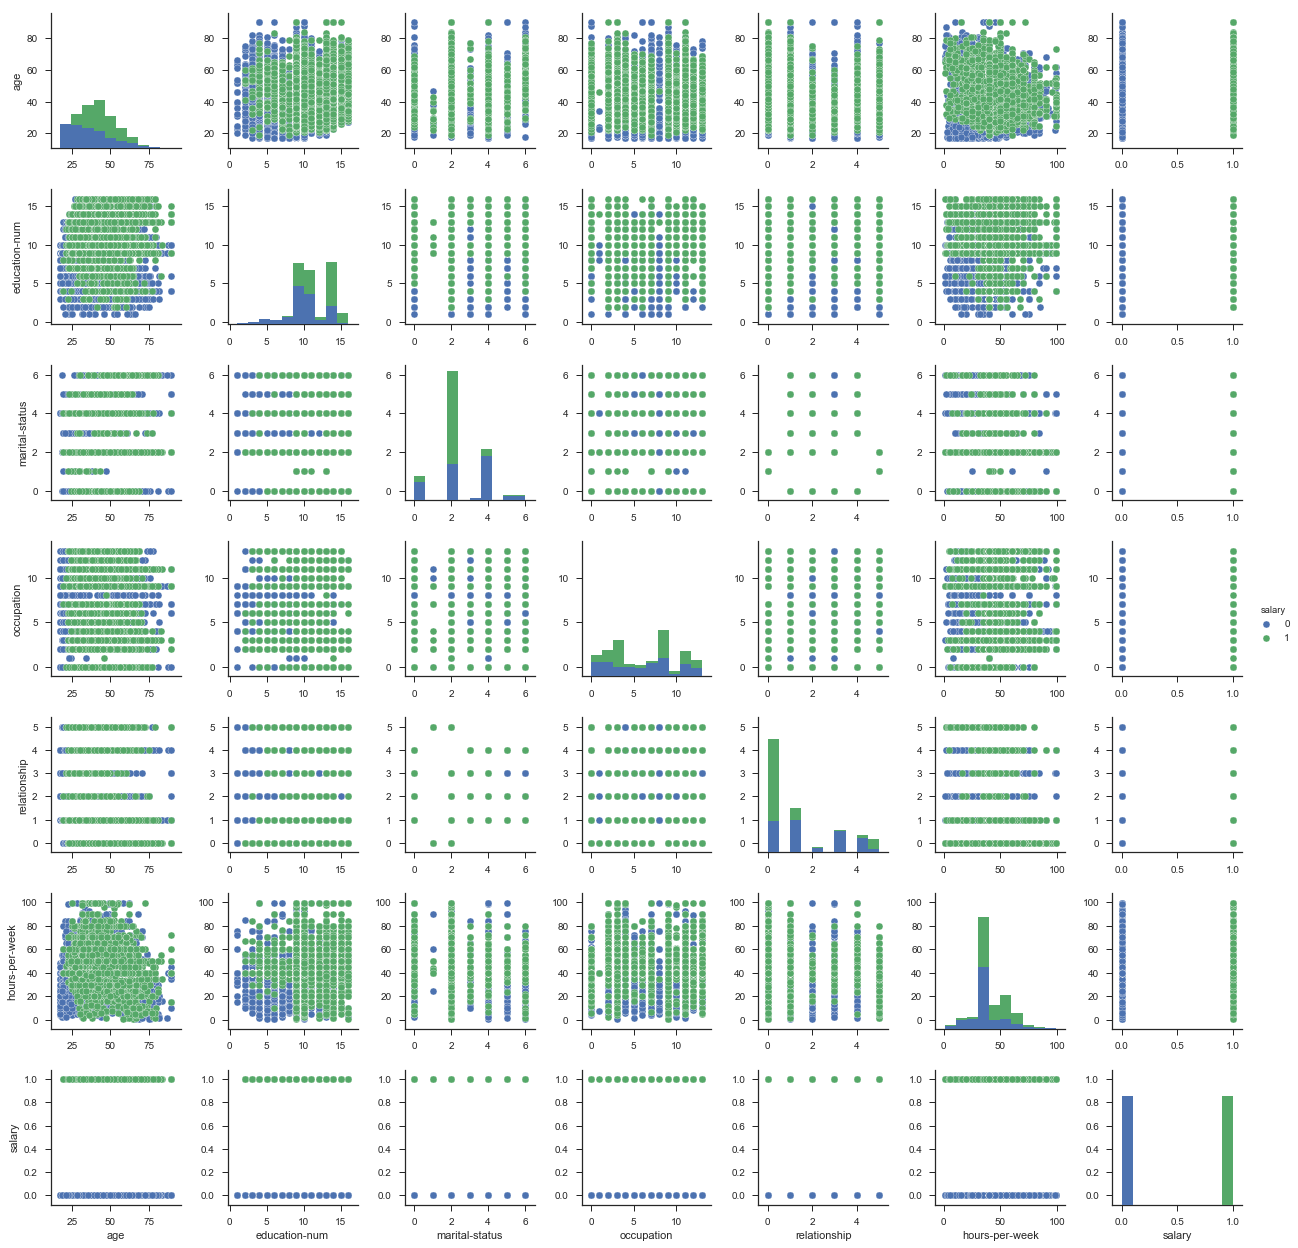

In [62]:
ptrain_set = train_set[train_set['salary'] == 0]
ntrain_set = train_set[train_set['salary'] == 1]
ptrain_set = ptrain_set.sample(n=ntrain_set.shape[0])
btrain_set = ptrain_set.append(ntrain_set).sample(frac=1).reset_index(drop=True)

# Plot scatter again
sns.set(style="ticks")
sns.pairplot(btrain_set[selected_cols + ['salary']], hue="salary")
plt.show()

## Train-Test Generation

In [63]:
train_x = train_set[selected_cols]
train_t = train_set['salary'].values.reshape(-1, 1)

test_x = test_set[selected_cols]
test_t = test_set['salary'].values.reshape(-1, 1)

# Normalize
for col in selected_cols:
    mean, std = train_x[col].mean(), train_x[col].std()
    train_x.loc[:, col] = (train_x[col] - mean) / std
    test_x.loc[:, col] = (test_x[col] - mean) / std
    
# Convert to indicator matrix
c = np.unique(train_t).tolist()
train_t = (train_t == c).astype(int)
test_t = (test_t == c).astype(int)
    
# Split into test and validation
split = int(len(test_t) / 2)
valid_x = test_x[0 : split]
valid_t = test_t[0 : split]

test_x = test_x[split :]
test_t = test_t[split :]
train_x

/Users/bairathirahul/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/bairathirahul/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/bairathirahul/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

age  education-num  marital-status  occupation  relationship  \
0      0.031          1.135           0.922      -1.545        -0.278   
1      0.837          1.135          -0.406      -0.790        -0.900   
2     -0.043         -0.420          -1.734      -0.287        -0.278   
3      1.057         -1.197          -0.406      -0.287        -0.900   
4     -0.776          1.135          -0.406       0.720         2.212   
5     -0.116          1.523          -0.406      -0.790         2.212   
6      0.764         -1.975           0.258       0.217        -0.278   
...      ...            ...             ...         ...           ...   
32554  1.057          1.523          -0.406      -0.790        -0.900   
32555 -1.216         -0.031           0.922       0.972        -0.278   
32556 -0.849          0.746          -0.406       1.475         2.212   
32557  0.104         -0.420          -0.406      -0.035        -0.900   
32558  1.424         -0.420           2.249      -1.545         1.589   
32559 -1.216         -0.420           0.922      -1.545         0.967   
32560  0.984         -0.420          -0.406      -0.790         2.212   

       hours-per-week  
0              -0.035  
1              -2.222  
2              -0.035  
3              -0.035  
4              -0.035  
5              -0.035  
6              -1.979  
...               ...  
32554          -0.035  
32555          -0.035  
32556          -0.197  
32557          -0.035  
32558          -0.035  
32559          -1.655  
32560          -0.035  

[32561 rows x 6 columns]

# III. Methods

In this assignment, you are build a deep network with more than 5 layers using TensorFlow. 
Looking at the chart below, get some idea about how you can construct your networks for what problem and why you pick your structure. 

- Pick at least 3 different networks for experiments.
- Summarize the choice of your networks. 
- Explain your TensorFlow codes. 
- Explain how you apply your model to your data. 

Following images are only for you to get some idea. You do not necessarily stick with these. You can come up with your own structure or shape. 

![](https://camo.githubusercontent.com/31e20172e3b7bc5530a6e7c7e7339e8e556d0acc/687474703a2f2f7777772e6173696d6f76696e737469747574652e6f72672f77702d636f6e74656e742f75706c6f6164732f323031362f30392f6e657572616c6e6574776f726b732e706e67)



## Network Selection - Perceptron
Here I have selected Multi Layer Perceptron classification model. It is the most basic form of an activation function and is a simple binary function that has only two possible results.

It perceptron consumes a lot of information for very little output - just 0 or 1.  Despite being a very basic model, it is very powerful. There are plethora of problems that the Perceptron model can solve. Consider the input vector as the coordinates of a point. For a vector with n elements, this point would live in an n-dimensional space. A single perceptron, as bare and simple as it might appear, is able to learn where this line is, even in an n-dimensional space, and when it finished learning, it can tell whether a given point is above or below that line.

The Perceptron consists of 4 parts .

- Input values or One input layer
- Weights and Bias
- Net sum
- Activation Function

![perceptron.png](https://cdn-images-1.medium.com/max/1600/1*n6sJ4yZQzwKL9wnF5wnVNg.png)

The perceptron works as follows:

a. All the inputs x are multiplied with their weights w
b. Weighted sum is calculated by summing up the result of above function
c. weighted sum is applied to the Activation Function

### Relation with data
The selected dataset clearly gives a non-linear decision boundary. As I am using 6 features, so I would need a model that separates along six dimension. Perceptron, despite of being a simple model, is known to learn properly across n-dimensions. That is why I have select this structure for my experiments.

### Utility functions

In [64]:
def reset_graph(seed=42):
    """
    Makes the output stable across runs
    """
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

### Experiment Class

Following is a class to perform experiments. It takes number of hidden units and number of features for intialization.

In [65]:
class Experiment:
    """
        n_hiddens: number of hidden units in each layer
        n_features: number of features in the training set
    """
    def __init__(self, n_hiddens, n_features, **kwargs):
        self.n_hiddens = n_hiddens
        self.n_features = n_features
        
        # Training epochs
        self.train_epochs = kwargs.pop('train_epochs', 100)
        # Test epochs
        self.test_epochs = kwargs.pop('test_epochs', 1000)
        # Batch size
        self.batch_size = kwargs.pop('batch_size', 1024)
        # Learning rate
        self.learning_rate = kwargs.pop('learning_rate', 0.01)
        # Standard deviation of layers
        self.stddev = kwargs.pop('stddev', 0.15)
        # Reference to layers
        self.layers = []
        
        # Reset
        reset_graph()
        
        
    def execute(self, train_x, train_y, valid_x, valid_y, test_x, test_y): 
        """
        train_x: training features
        train_y: training target
        valid_x: validation features
        valid_y: validation target
        test_x: test features
        test_y: test target
        """
        
        n_classes = train_y.shape[1]
        n_records = train_y.shape[0]
        
        # Input features
        X = tf.placeholder(tf.float32, [None, self.n_features])
        
        # First input layer of the Network
        n_hidden = self.n_hiddens[0]
        weights = tf.Variable(tf.truncated_normal([self.n_features, n_hidden], stddev = self.stddev))
        y = tf.nn.sigmoid(tf.matmul(X, weights) + tf.Variable(tf.zeros([n_hidden])))
        self.layers.append(y)
        w1 = weights
        
        # Hidden layers of the network
        i = 1
        for n_hidden in n_hiddens[1:]:
            weights = tf.Variable(tf.truncated_normal([n_hiddens[i - 1], n_hidden], stddev = self.stddev))
            b = tf.Variable(tf.zeros([n_hidden]))
            y = tf.nn.sigmoid(tf.matmul(y, weights) + tf.Variable(tf.zeros([n_hidden])))
            self.layers.append(y)
            i += 1
            
        # Output layers of the network
        weights = tf.Variable(tf.truncated_normal([n_hiddens[i - 1], n_classes], stddev = self.stddev)) 
        y = tf.nn.softmax(tf.matmul(y, weights) + tf.Variable(tf.zeros([n_classes])))
        
        # output
        Y = tf.placeholder(tf.float32, [None, n_classes])
        
        # Start the tensorflow session
        with tf.Session() as sess:
            # Gradient Descent optimizer
            optimizer = tf.train.GradientDescentOptimizer(self.learning_rate) \
                .minimize(-tf.reduce_sum(Y * tf.log(y)))
                
            # Accuracy function
            self.accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y, 1), tf.argmax(Y, 1)), tf.float32))

            # Initialize variables
            acc_train = []
            acc_valid = []
            acc_test = []
            stop_early = 0
            
            sess.run(tf.global_variables_initializer())
            
            for epoch in range(self.train_epochs):
                for batch in range(n_records // self.batch_size):
                    # Extract batches
                    batch_x = train_x[batch * self.batch_size : (1 + batch) * self.batch_size]
                    batch_y = train_y[batch * self.batch_size : (1 + batch) * self.batch_size]
                    
                    # Run optimization - Gradient Descent
                    sess.run([optimizer], feed_dict={X: batch_x, Y: batch_y})
                
                # Append accuracies
                acc_train.append(sess.run([self.accuracy], feed_dict={X: train_x, Y: train_y}))
                acc_valid.append(sess.run([self.accuracy], feed_dict={X: valid_x, Y: valid_y}))
                
                print(str(epoch) + '. Accuracies: train ' + str(acc_train[-1]) + ', validation ' + str(acc_valid[-1]))
                
            # Display training results
            plt.figure(figsize=(20, 5))
            plt.plot(acc_train, color='red', label='Training Accuracies')
            plt.plot(acc_valid, color='green', label='Validation Accuracies')
            plt.legend()
            plt.title('Accuracies')
            plt.show()
            
            # Backward pass with AdamOptimizer
            mse = tf.reduce_mean(tf.square(Y - y), name="mse")
            optimizer = tf.train.AdamOptimizer(learning_rate=self.learning_rate) \
                .minimize(mse, name="mse")
            sess.run(tf.global_variables_initializer())
            trace = []
            for epoch in range(self.test_epochs):
                err, _ = sess.run([mse, optimizer], {X: train_x, Y: train_y})
                trace.append(err)
                
            # Display output
            plt.figure(figsize=(20, 10 * len(self.n_hiddens)))
            # Plot outputs
            for i in range(len(self.n_hiddens)):
                plt.subplot(len(self.n_hiddens) + 1, 1, i + 1)
                plt.plot(train_x, self.layers[i].eval({X: train_x}))
                plt.ylabel('Hidden unit ' + str(i + 1));

            # Plot RMSE
            plt.subplot(len(self.n_hiddens) + 1, 1, len(self.n_hiddens) + 1)
            plt.plot(trace[:epoch])
            plt.xlabel('Epochs')
            plt.ylabel('RMSE')
            plt.legend(('Train','Test'))
            plt.show()
            
            # Performing prediction
            test_t = sess.run(tf.matmul(X, w1), {X: test_x})
            
        show_graph(tf.get_default_graph())

# IV - Results

- Presents the results of applications of your deep networks.
- Visualize the results 
- Discuss about the choice of network structures and performance of it as you change the structures.  
- What do you think about the results? 

## 1. Experiment with 6 Hidden Layers
With Neural Networks, it is a known fact that by adding more layers, the network improves, but might over-fit. I will consider the result of this experiment as the baseline to compare further experiment.

0. Accuracies: train [0.24080956], validation [0.23292384]
1. Accuracies: train [0.75919044], validation [0.76707619]
2. Accuracies: train [0.75919044], validation [0.76707619]
3. Accuracies: train [0.75919044], validation [0.76707619]
4. Accuracies: train [0.24080956], validation [0.23292384]
5. Accuracies: train [0.75919044], validation [0.76707619]
6. Accuracies: train [0.24080956], validation [0.23292384]
7. Accuracies: train [0.75919044], validation [0.76707619]
8. Accuracies: train [0.75919044], validation [0.76707619]
9. Accuracies: train [0.24080956], validation [0.23292384]
10. Accuracies: train [0.24080956], validation [0.23292384]
11. Accuracies: train [0.24080956], validation [0.23292384]
12. Accuracies: train [0.75919044], validation [0.76707619]
13. Accuracies: train [0.75919044], validation [0.76707619]
14. Accuracies: train [0.75919044], validation [0.76707619]
15. Accuracies: train [0.75919044], validation [0.76707619]
16. Accuracies: train [0.75919044], validation [0.

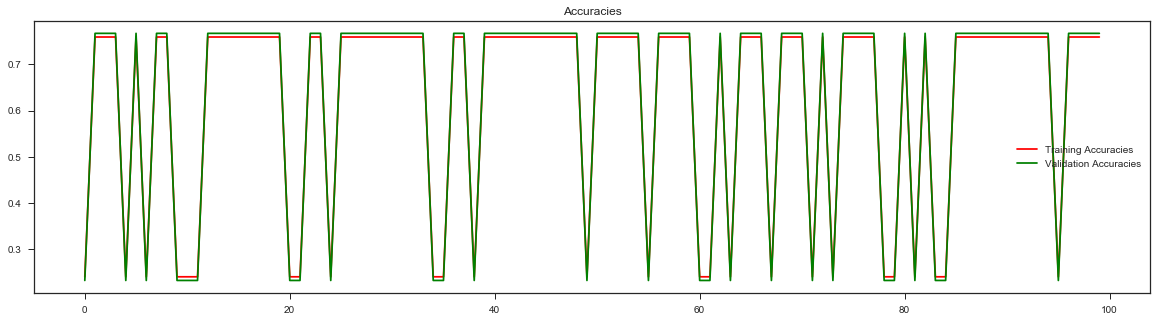

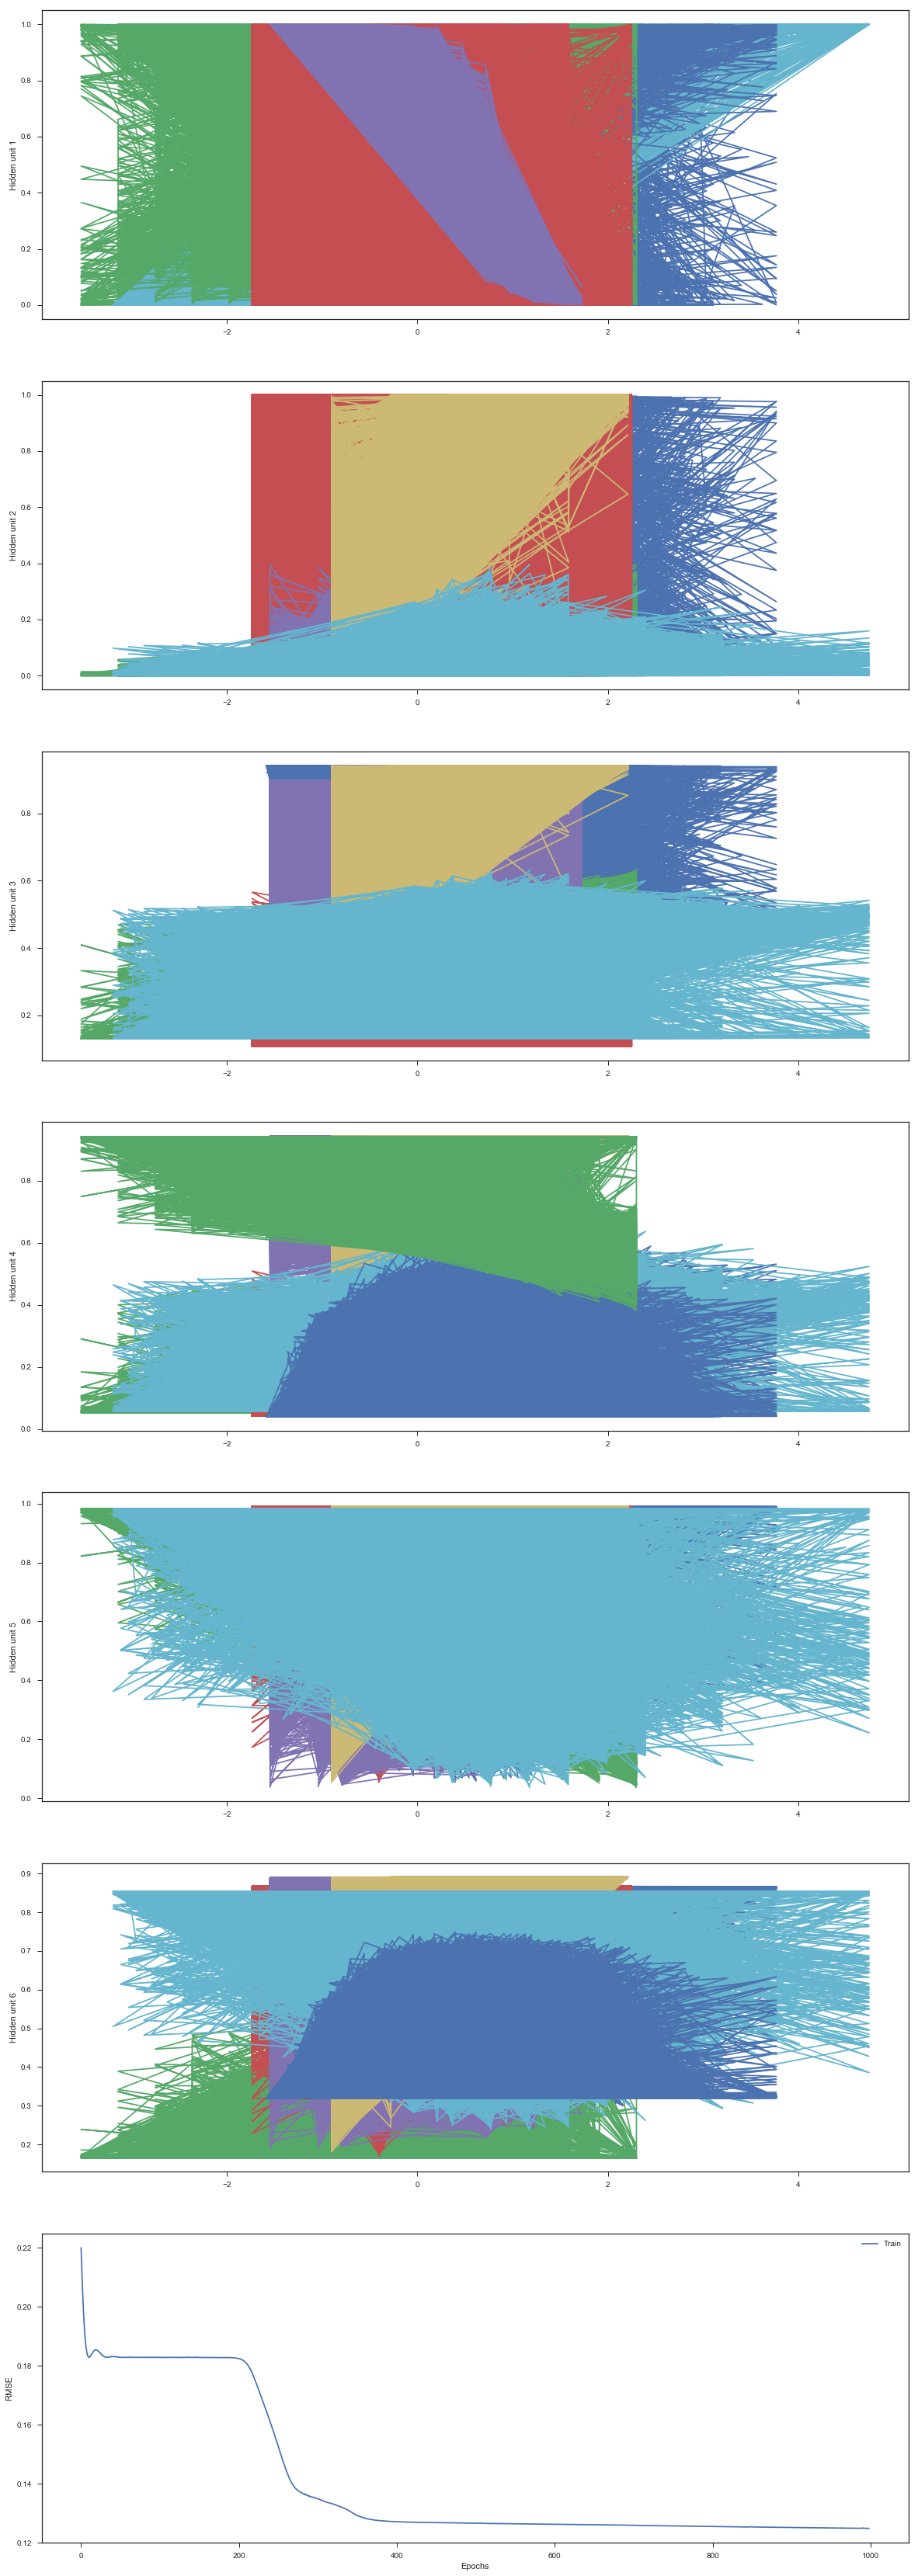

In [66]:
n_hiddens = [10, 2, 4, 8, 2, 7]
n_input = len(selected_cols)
experiment = Experiment(n_hiddens, n_input)
experiment.execute(train_x, train_t, valid_x, valid_t, test_x, test_t)

From the above results, we can see that the model generalizes well. There is not much difference in the training and validation accuracies. Therefore it is not overfitting. However, from the plots it can be observed that the model is complex. In the further sections, I will attempt to add more layers in order to simply the model and compare their accuracies.

## 2. Experiment with 12 Hidden Layers
By adding more layers, I would expect the model to give better accuracy and being more simpler. From the preliminary analysis of the data, it was observed that there was no Linear Decision boundary. Even though previous model did well, but there could still be a possibility of improvement.

0. Accuracies: train [0.24080956], validation [0.23292384]
1. Accuracies: train [0.75919044], validation [0.76707619]
2. Accuracies: train [0.75919044], validation [0.76707619]
3. Accuracies: train [0.75919044], validation [0.76707619]
4. Accuracies: train [0.24080956], validation [0.23292384]
5. Accuracies: train [0.75919044], validation [0.76707619]
6. Accuracies: train [0.75919044], validation [0.76707619]
7. Accuracies: train [0.75919044], validation [0.76707619]
8. Accuracies: train [0.75919044], validation [0.76707619]
9. Accuracies: train [0.24080956], validation [0.23292384]
10. Accuracies: train [0.24080956], validation [0.23292384]
11. Accuracies: train [0.75919044], validation [0.76707619]
12. Accuracies: train [0.75919044], validation [0.76707619]
13. Accuracies: train [0.75919044], validation [0.76707619]
14. Accuracies: train [0.75919044], validation [0.76707619]
15. Accuracies: train [0.75919044], validation [0.76707619]
16. Accuracies: train [0.75919044], validation [0.

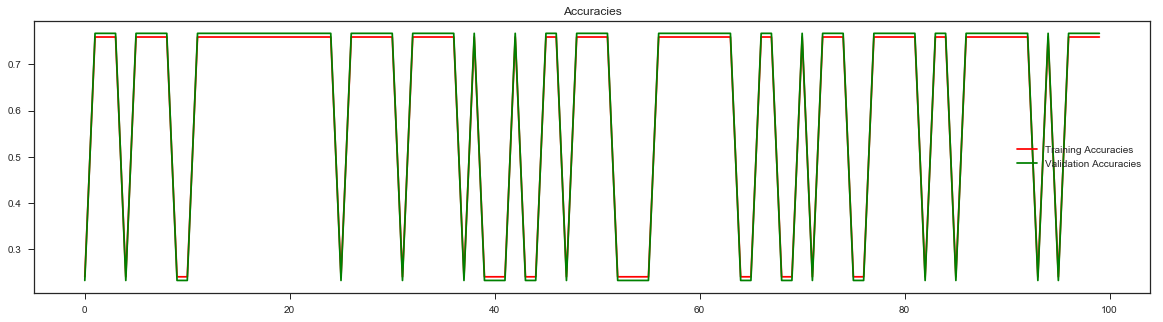

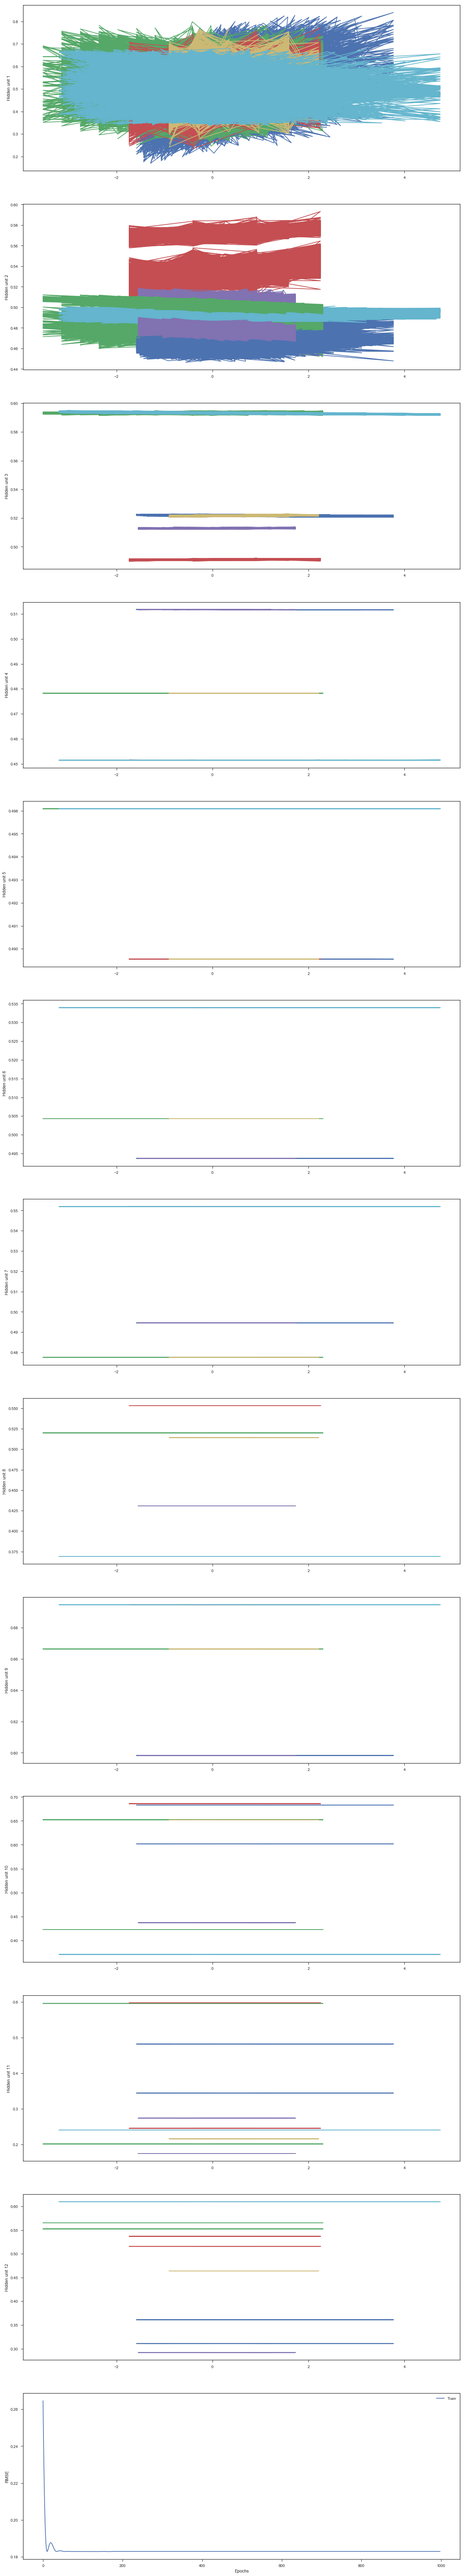

In [67]:
n_hiddens = [6, 10, 4, 3, 2, 3, 3, 5, 3, 8, 10, 9]
n_input = len(selected_cols)
experiment = Experiment(n_hiddens, n_input)
experiment.execute(train_x, train_t, valid_x, valid_t, test_x, test_t)

Clearly, the accuracy of this model is same or better than the one used in Experiment 1. It can also be observed that the model simplifies from Layer 3 and beyond. Another interesting point from the RMSE plot is that it converges much sooner than the model in the previous experiment. Therefore, it is better.

## 3. Experiment with 20 Hidden Layers

0. Accuracies: train [0.75919044], validation [0.76707619]
1. Accuracies: train [0.75919044], validation [0.76707619]
2. Accuracies: train [0.75919044], validation [0.76707619]
3. Accuracies: train [0.75919044], validation [0.76707619]
4. Accuracies: train [0.75919044], validation [0.76707619]
5. Accuracies: train [0.75919044], validation [0.76707619]
6. Accuracies: train [0.75919044], validation [0.76707619]
7. Accuracies: train [0.75919044], validation [0.76707619]
8. Accuracies: train [0.75919044], validation [0.76707619]
9. Accuracies: train [0.75919044], validation [0.76707619]
10. Accuracies: train [0.75919044], validation [0.76707619]
11. Accuracies: train [0.75919044], validation [0.76707619]
12. Accuracies: train [0.24080956], validation [0.23292384]
13. Accuracies: train [0.24080956], validation [0.23292384]
14. Accuracies: train [0.75919044], validation [0.76707619]
15. Accuracies: train [0.75919044], validation [0.76707619]
16. Accuracies: train [0.75919044], validation [0.

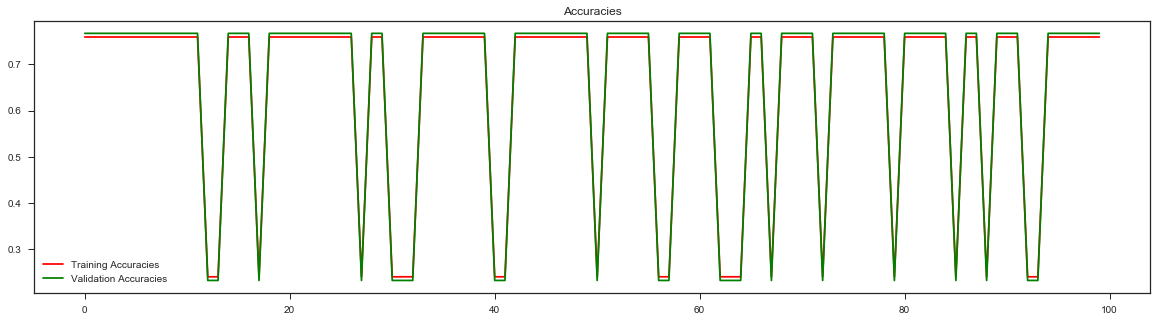

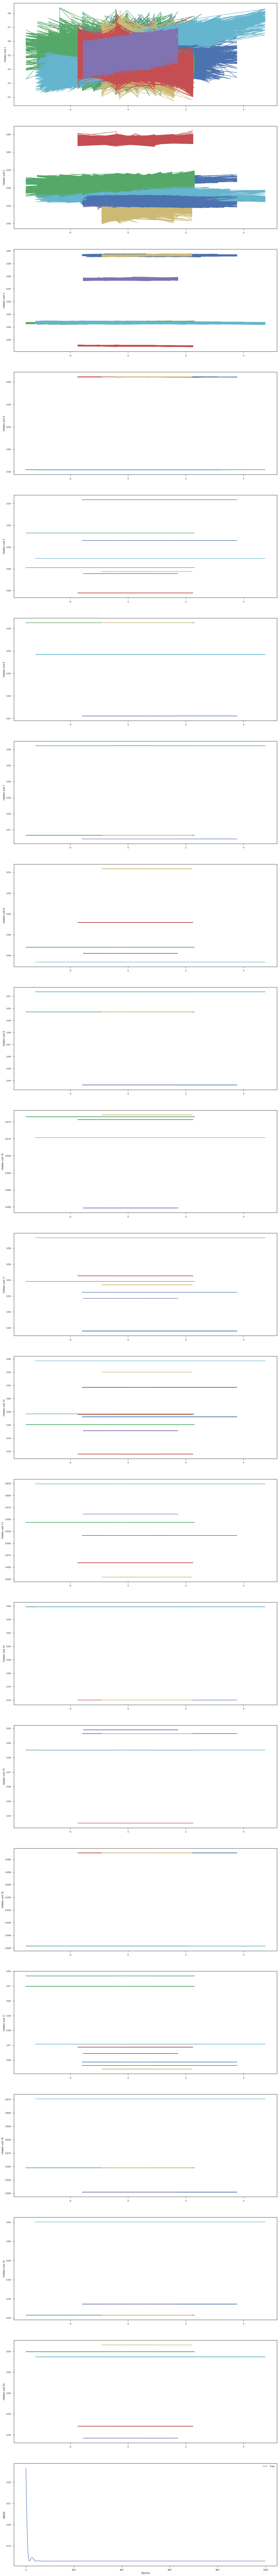

In [68]:
n_hiddens = [10, 8, 4, 2, 8, 3, 3, 5, 3, 5, 7, 9, 6, 2, 4, 2, 8, 3, 3, 5]
n_input = len(selected_cols)
experiment = Experiment(n_hiddens, n_input)
experiment.execute(train_x, train_t, valid_x, valid_t, test_x, test_t)

The model with 20 layers did not receive a significant improvement over the model with 12 layers. The test and validation accuracies are similar. Like the previous model, this is also simple from layer 3 and beyond.

# Conclusions

Discuss the challenges or some that that you learned. If you have any suggestion about the assignment, you can write about it. 

With this assignment, I am able to get a good grasp of Tensorflow architecture. This as also developed a foundation from where I can learn more and improve skill with this framework. A major challenge I faced while working with this assignment was with the selection of hidden layers, as there is no fixed set of criteria to do that.

# Extra Credit

- Test your program with GPUs and compare training speed. You can try [FloydHub](https://www.floydhub.com/) for free 2 hours of GPU resources. 

The URL to job on FloydHub is as follows:
https://www.floydlabs.com/notebooks/tMxHQsDLxJ7d4cVe6FdviU/notebooks/rbairath_assignment5.ipynb

For the experiments, FloydHub took 17 seconds, whiile local Jupyter took 66 seconds

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| Includes description of your data
 | 5| Plots to visualize data 
 | 5| Reading and analyzing the plots 
50 | Methods | 
 | 30| Explanation of the choice for 3 different neural network structures and reason for the selection. (10 points for each) 
 |   | Relate the choice of your data!
 | 15| Explanation of codes for each structure
 |  5| Explanation of experimental codes
25 | Results | Your Data
| 15| plots for results 
| 10| Discussions about the choice of network structures 
5 | Conclusions 
